## 使用决策树进行分类预测

In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image

### 使用 iris 数据集

In [2]:
iris = load_iris()

In [3]:
data=np.hstack((iris.data, np.array([iris.target_names[iris.target]]).T))
pd.DataFrame(data=data,columns=iris.feature_names+['result']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.feature_names = ['萼片长度','萼片宽度','花瓣长度','花瓣宽度']

### 划分测试数据，训练数据

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

### 基于gini不纯度的决策树

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
y_pred = clf.predict(X_test)
sum(y_pred == y_test)

36

In [8]:
sum(y_pred != y_test)

2

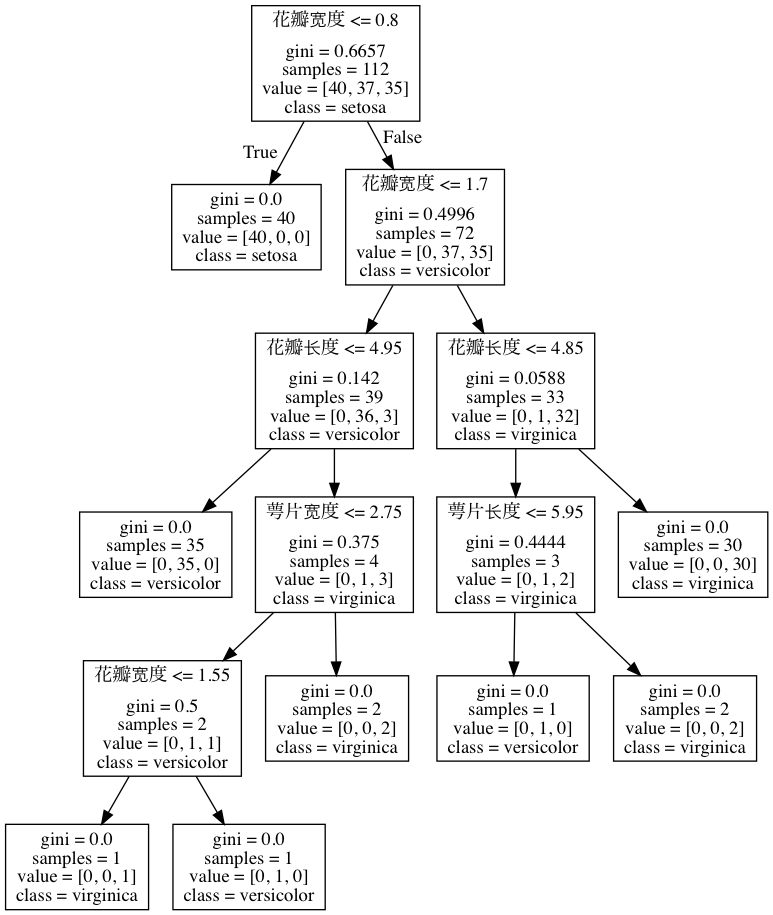

In [9]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                class_names=iris.target_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.create_png()
Image(graph.create_png())